In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE # for sampling
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, make_scorer, confusion_matrix
from sklearn.preprocessing import StandardScaler

# for neural network
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

## **EDA**

### Variable Definitions:
- **Age**: the age of the patient at diagnosis for this cancer
- **Race**: based on the race variables and the American Indian/Native American IHS link variable
- **Marital status**: the patient’s marital status at the time of diagnosis for the reportable tumor
- **T stage**: extent of the tumor (number indicates size, i.e. T4 is bigger than T2)
- **N stage**: extent of spread to the lymph nodes (number indicates number of lymph nodes breast cancer has spread to)
- **6th stage** (breast cancer stage)(6): Stage IIA, Stage IIB, Stage IIIA, Stage IIIB, and Stage IIIC.
- **Grade** & **differentiation**: (ICD-O-2; 1992)
    - Grade I; grade i; grade 1; well differentiated; differentiated, NOS
    - Grade II; grade ii; grade 2; moderately differentiated; moderately differentiated; intermediate differentiation
    - Grade III; grade iii; grade 3; poorly differentiated; differentiated
    - Grade IV; grade iv; grade 4; undifferentiated; anaplastic
- **A Stage**:
    - Regional — A neoplasm that has extended 1) beyond the limits of the organ of origin directly into surrounding organs or tissues; 2) into regional lymph nodes by way of the lymphatic system; or 3) by a combination of extension and regional lymph nodes.
    - Distant — A neoplasm that has spread to parts of the body remote from the primary tumor either by direct extension or by discontinuous metastasis (e.g., implantation or seeding) to distant organs, issues, or via the lymphatic system to distant lymph nodes.
- **Tumor size**: size of tumor in millimeter(mm)
- **Estrogen Status**: Whether patient produces estrogen
- **Progesterone Status**: Whether patient produces Progesterone
- **Regional Node Examined**: Records the total number of regional lymph nodes that were removed and examined by the pathologist.
- **Regional Node Positive**: Records the exact number of regional lymph nodes examined by the pathologist that were found to contain metastases.
- **Survival Months**: a 4-digit field containing complete months of survival
    - Survival Months = floor((date last contact – date dx) / days in a month)
- **Status**: Patient is alive or dead


In [ ]:
df = pd.read_csv('Breast_Cancer.csv')
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
df.info() # Get general info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [ ]:
df.describe() # Get general statistics for quantitative variables

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,53.972167,30.473658,14.357107,4.158052,71.297962
std,8.963134,21.119696,8.099675,5.109331,22.921430
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


In [ ]:
df.describe(include=object) # qualitative variables

,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024,4024
unique,3,5,4,3,5,4,4,2,2,2,2
top,White,Married,T2,N1,IIA,Moderately differentiated,2,Regional,Positive,Positive,Alive
freq,3413,2643,1786,2732,1305,2351,2351,3932,3755,3326,3408


In [ ]:
df.isna().sum() # Check for NAs

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [ ]:
df.columns = df.columns.str.strip() # remove blank spaces
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
# Drop irrelevant or columns with duplicated information, rename typos
#df.columns = df.columns.str.strip()
df = df.drop(['Race', 'Marital Status', 'T Stage', 'N Stage', 'differentiate'], axis=1)
df = df.rename(columns={'Reginol Node Positive': 'Regional Node Positive'})
df

,Age,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,IIA,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,IIIA,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,IIIC,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,IIA,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,IIB,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...
4019,62,IIA,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,IIIA,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,IIB,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,IIB,2,Regional,44,Positive,Positive,11,1,72,Alive


In [ ]:
df.describe(include=object) # check if needed to encode categorical variables as numeric or one-hot encoding

,6th Stage,Grade,A Stage,Estrogen Status,Progesterone Status,Status
count,4024,4024,4024,4024,4024,4024
unique,5,4,2,2,2,2
top,IIA,2,Regional,Positive,Positive,Alive
freq,1305,2351,3932,3755,3326,3408


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   6th Stage               4024 non-null   object
 2   Grade                   4024 non-null   object
 3   A Stage                 4024 non-null   object
 4   Tumor Size              4024 non-null   int64 
 5   Estrogen Status         4024 non-null   object
 6   Progesterone Status     4024 non-null   object
 7   Regional Node Examined  4024 non-null   int64 
 8   Regional Node Positive  4024 non-null   int64 
 9   Survival Months         4024 non-null   int64 
 10  Status                  4024 non-null   object
dtypes: int64(5), object(6)
memory usage: 345.9+ KB


In [ ]:
# encode categorical variables to numeric (no need one hot encoding as ordinal data)
# one-hot encoding not needed for 6th stage and Grade as they are ordinal data
df['6th Stage'] = df['6th Stage'].map({"IIA": 1, "IIB": 2, "IIIA": 3, "IIIB": 4, "IIIC": 5})
df['Grade'] = df['Grade'].map({"1": 1, "2": 2, "3": 3, " anaplastic; Grade IV": 4})
df['A Stage'] = df['A Stage'].map({"Regional": 0, "Distant": 1})
df['Estrogen Status'] = df['Estrogen Status'].map({"Negative": 0, "Positive": 1})
df['Progesterone Status'] = df['Progesterone Status'].map({"Negative": 0, "Positive": 1})
df['Status'] = df['Status'].map({"Dead": 0, "Alive": 1})

# - can remove race, martial status
# - remove differentiate as similar to grade
# - remove regional node examined & N stage
# - Tumor size and T stage say the same information, tumor size more speciifc and numeric
# - change estrogen and progesterone to 1/0s

# one hot encoding
#pd.get_dummies(X_train_smote, columns=['6th Stage', 'Grade'])

In [ ]:
df.columns

Index(['Age', '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Regional Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     4024 non-null   int64
 1   6th Stage               4024 non-null   int64
 2   Grade                   4024 non-null   int64
 3   A Stage                 4024 non-null   int64
 4   Tumor Size              4024 non-null   int64
 5   Estrogen Status         4024 non-null   int64
 6   Progesterone Status     4024 non-null   int64
 7   Regional Node Examined  4024 non-null   int64
 8   Regional Node Positive  4024 non-null   int64
 9   Survival Months         4024 non-null   int64
 10  Status                  4024 non-null   int64
dtypes: int64(11)
memory usage: 345.9 KB


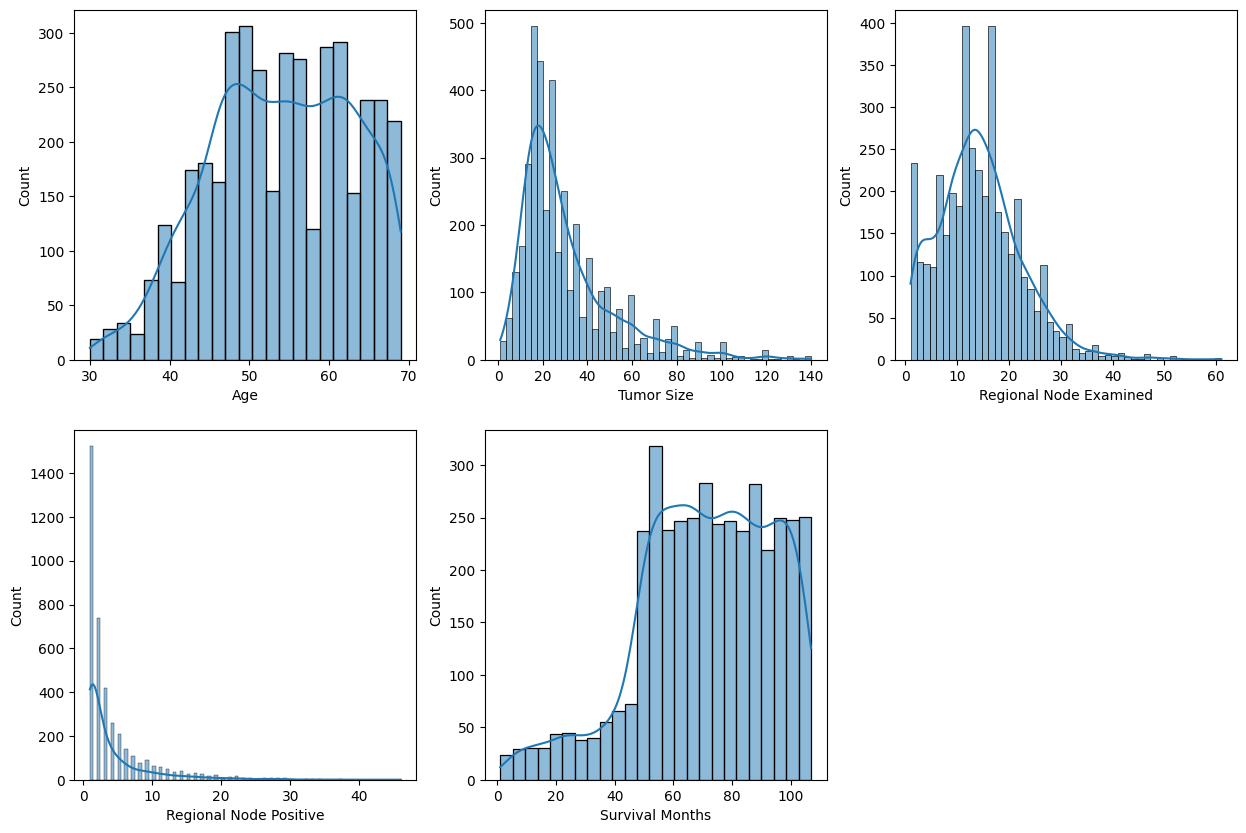

In [ ]:
plt.figure(figsize=(15,10))
# hist: age, tumor size, regional node examined, regional node positive, survival months
cont_feats = ['Age', 'Tumor Size', 'Regional Node Examined','Regional Node Positive', 'Survival Months']
for i,feat in enumerate(cont_feats):
    i+=1
    plt.subplot(2,3,i)
    sns.histplot(data=df, x=feat, kde=True)

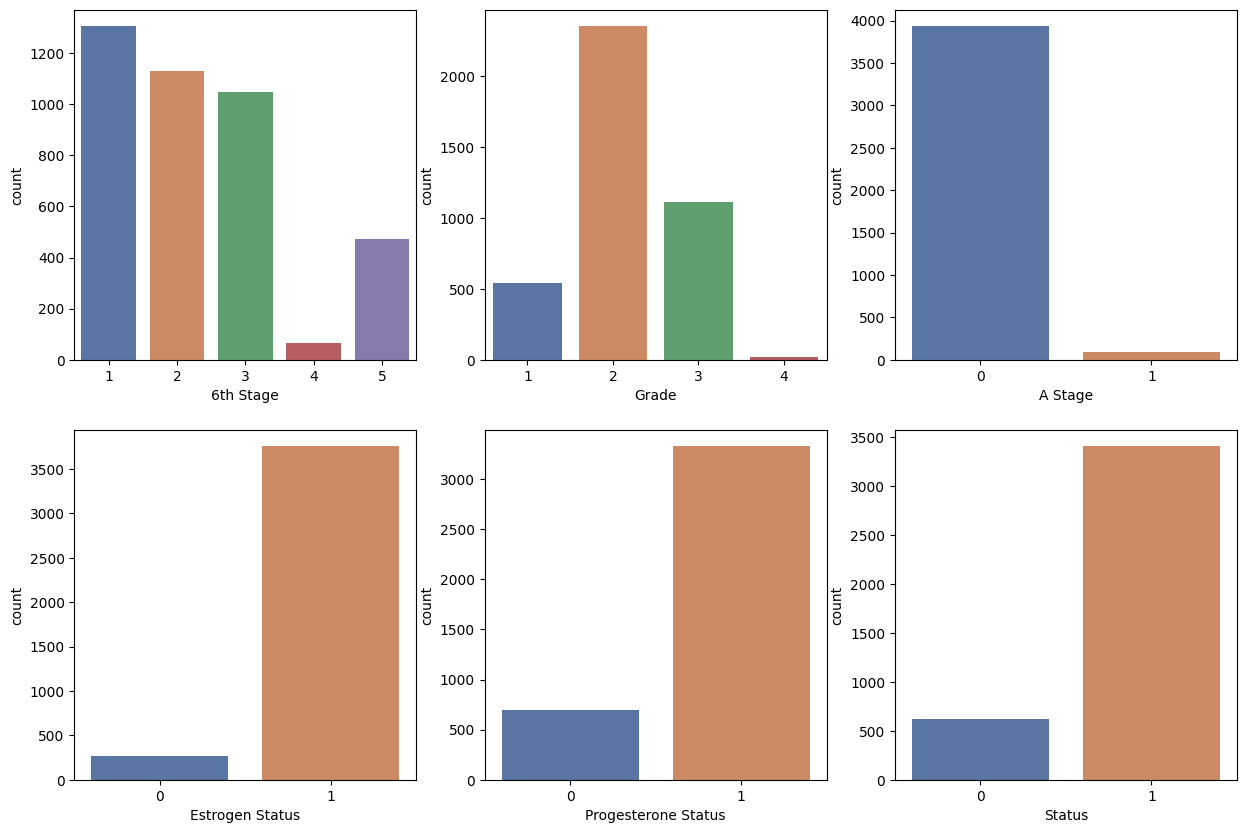

In [ ]:
plt.figure(figsize=(15,10))
# countplot: 6th stage, grade, A stage, estrogen, progesterone, Status
discrete_feats = ['6th Stage', 'Grade', 'A Stage', 'Estrogen Status', 'Progesterone Status', 'Status']
for i,feat in enumerate(discrete_feats):
    i+=1
    plt.subplot(2,3,i)
    sns.countplot(data=df, x=feat, palette='deep')


In [ ]:
#We can observe that in the dataset there is are more "Alive" patients (3408) than "Dead" patients (616). Need to perform some sort of sampling method, otherwise classifiers will be biased
print(df['Status'].value_counts())

1    3408
0     616
Name: Status, dtype: int64


In [ ]:
# sns.kdeplot(df.loc[df['Status'] == 0, 'Tumor Size'], shade=True, label='Dead')
# sns.kdeplot(df.loc[df['Status'] == 1, 'Tumor Size'], shade=True, label='Alive')
# plt.legend()

In [ ]:
# sns.countplot(data=df, x='6th Stage', hue='Status', palette='deep')

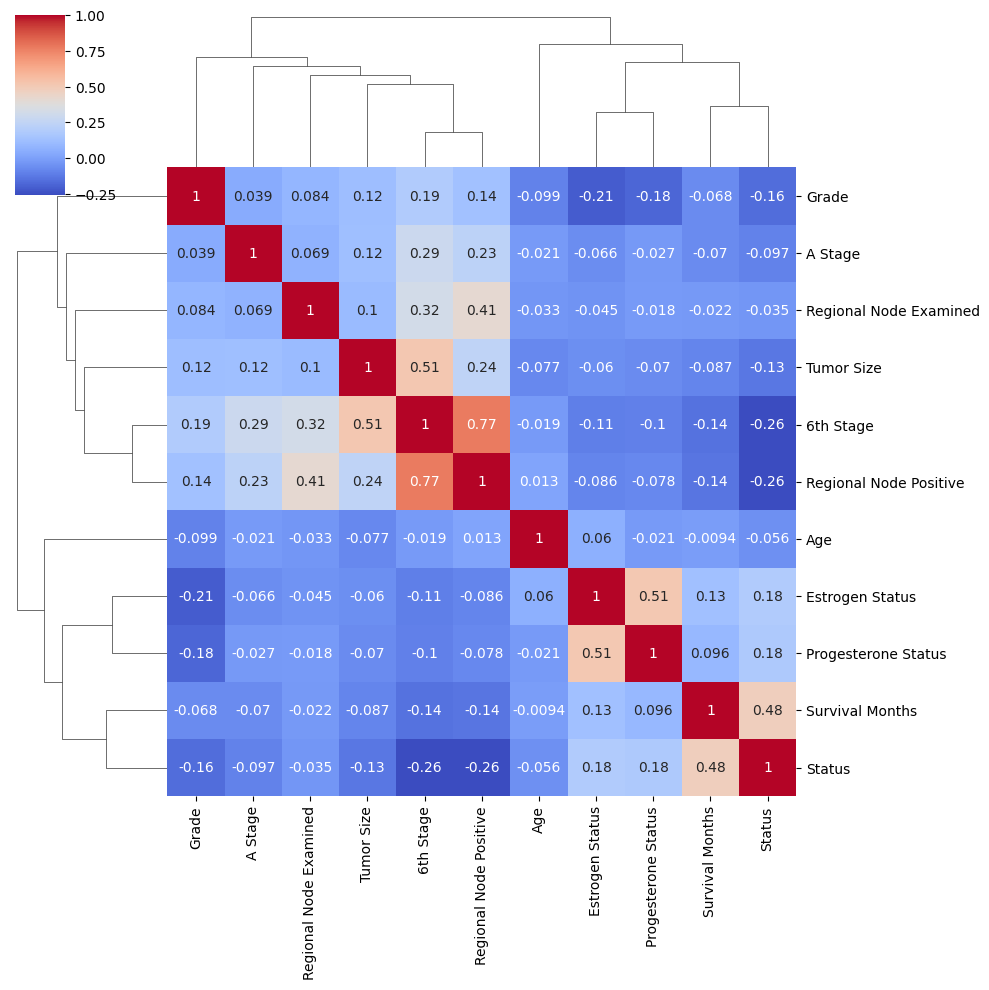

In [ ]:
sns.clustermap(df.corr(), cmap='coolwarm', annot= True)

# Data Preparation

In [ ]:
# Extract X and y
X = df.drop('Status', axis=1)  # features
y = df['Status'] # target

# 80% train / 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Perform Synthetic Minority Over-sampling Technique (SMOTE) to balance number of alive and dead patients
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train) # synthesize "dead" patients to match number of alive

In [ ]:
# Before SMOTE
print('Before SMOTE:')
print(f'Number of patients: {len(y_train)}')
print(f'Alive: {sum(y_train)}')
print(f'Dead: {len(y_train) - sum(y_train)}')

print()
# After SMOTE
print('After SMOTE:')
print(f'Number of patients: {len(y_train_smote)}')
print(f'Alive: {sum(y_train_smote)}')
print(f'Dead: {len(y_train_smote) - sum(y_train_smote)}')

Before SMOTE:
Number of patients: 3219
Alive: 2723
Dead: 496

After SMOTE:
Number of patients: 5446
Alive: 2723
Dead: 2723


In [ ]:
X_train_smote # before scaling

,Age,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,61,1,2,0,14,1,1,26,2,69
1,52,2,1,0,34,1,1,2,1,64
2,50,1,1,0,12,1,1,9,2,67
3,66,1,3,0,15,1,1,14,1,83
4,50,2,2,0,21,1,1,12,2,92
...,...,...,...,...,...,...,...,...,...,...
5441,44,3,2,0,74,1,0,19,3,52
5442,47,2,2,0,26,0,0,3,2,15
5443,57,3,2,0,24,1,0,19,9,65
5444,54,2,3,0,30,0,0,16,8,23


In [ ]:
# Feature scaling for cont variables:
def standard_scaler(df, feat_name):
    features = df[feat_name]
    scaler = StandardScaler().fit(features.values)
    scaled_features = scaler.transform(features.values)
    df[feat_name] = scaled_features
    return df

In [ ]:
X_test_surviv = X_test.copy(deep=True) # save for later (before scaling)

In [ ]:
# Apply to features
X_train_smote = standard_scaler(X_train_smote, cont_feats)
X_test = standard_scaler(X_test, cont_feats)

In [ ]:
X_train_smote # after scaling

,Age,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
0,0.757354,1,2,0,-0.865802,1,1,1.515444,-0.525334,0.318577
1,-0.255441,2,1,0,0.086092,1,1,-1.556813,-0.692613,0.130451
2,-0.480506,1,1,0,-0.960991,1,1,-0.660738,-0.525334,0.243327
3,1.320017,1,3,0,-0.818207,1,1,-0.020685,-0.692613,0.845328
4,-0.480506,2,2,0,-0.532639,1,1,-0.276706,-0.525334,1.183955
...,...,...,...,...,...,...,...,...,...,...
5441,-1.155702,3,2,0,1.989878,1,0,0.619369,-0.358055,-0.321050
5442,-0.818104,2,2,0,-0.294666,0,0,-1.428803,-0.525334,-1.713179
5443,0.307223,3,2,0,-0.389855,1,0,0.619369,0.645618,0.168076
5444,-0.030375,2,3,0,-0.104287,0,0,0.235337,0.478339,-1.412179


# Trivial ML Classifiers (do NOT use)

In [ ]:
# The ideal model has the best AUC but also
# 1) maximizes specificity (TNR)
# 2) maximizes precision
# 3) maximizes recall

def metrics(y_test, y_pred):
    TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

    # Precision (PPV): cost of false positives is high; measures the accuracy of the positive predictions (how many of the predicted positive instances are actually positive)
    precision = TP / (TP + FP)

    # Recall (Sensitivity, TPR): cost of false negatives is high; measures the ability of the model to capture all the positive instances (how many of the actual positive instances were predicted correctly)
    recall = TP / (TP + FN)

    # Specificity (TNR): cost of false positives is high; measures the ability of the model to correctly identify negative instances (how many of the actual negative instances were predicted correctly)
    specificity = TN / (TN + FP)

    # F1 Score: harmonic mean of precision and recall; provides a balance between precision and recall
    f1_score = 2 * (precision * recall) / (precision + recall)

    # Balanced Error Rate (BER): 1 - 0.5 * (True Positive Rate + True Negative Rate)
    BER = 1 - 0.5 * (recall + specificity)

    return precision, recall, specificity, f1_score, BER

## Logistic Regression (trivial)

In [ ]:
# Basic LR model
lr_mod = LogisticRegression(random_state=42)
lr_mod.fit(X_train_smote, y_train_smote)
ypred = lr_mod.predict(X_test)

# Calculate relevant metrics
lr_precision, lr_recall, lr_specificity, lr_f1, lr_BER = metrics(y_test,ypred)

# Get AUC score
ypred_scores = lr_mod.predict_proba(X_test)[:,1]
lr_FPRs, lr_TPRs, _ = roc_curve(y_test, ypred_scores)
lr_auc = auc(lr_FPRs, lr_TPRs)

In [ ]:
lr_precision, lr_recall, lr_specificity, lr_f1, lr_BER ,lr_auc

(0.974304068522484,
 0.6642335766423357,
 0.9,
 0.7899305555555556,
 0.21788321167883207,
 0.8906204379562045)

## Random Forest (trivial)

In [ ]:
# basic RF model
rf_mod = RandomForestClassifier(random_state=42)
rf_mod.fit(X_train_smote, y_train_smote)
ypred = rf_mod.predict(X_test)

# Calculate relevant metrics
rf_precision, rf_recall, rf_specificity, rf_f1, rf_BER = metrics(y_test,ypred)

# Get AUC score
ypred_scores = rf_mod.predict_proba(X_test)[:,1]
rf_FPRs, rf_TPRs, _ = roc_curve(y_test, ypred_scores)
rf_auc = auc(rf_FPRs, rf_TPRs)

In [ ]:
rf_precision, rf_recall, rf_specificity, rf_f1, rf_BER, rf_auc

(0.9681050656660413,
 0.7532846715328467,
 0.8583333333333333,
 0.8472906403940887,
 0.19419099756691005,
 0.8630900243309002)

## SVM (SVC) (trivial)

In [ ]:
# Train SVC model (rbf kernel)
svc_mod = SVC(probability=True)
svc_mod.fit(X_train_smote, y_train_smote)
ypred = svc_mod.predict(X_test)

# Calculate relevant metrics
svc_precision, svc_recall, svc_specificity, svc_f1, svc_BER = metrics(y_test,ypred)

# Get AUC score
#ypred_scores = svc_mod.decision_function(X_test)
ypred_scores = svc_mod.predict_proba(X_test)[:,1]
svc_FPRs, svc_TPRs, _ = roc_curve(y_test, ypred_scores)
svc_auc = auc(svc_FPRs, svc_TPRs)

In [ ]:
svc_precision, svc_recall, svc_specificity, svc_f1, svc_BER, svc_auc

(0.9724409448818898,
 0.7211678832116788,
 0.8833333333333333,
 0.8281642917015926,
 0.19774939172749395,
 0.8811922141119222)

# Hyperparameter Tuning ML Classifiers

### Logistic Regression (tuned)

In [ ]:
# 10-fold CV of 'liblinear' LR Model:
lr_mod = LogisticRegression(random_state=42)
lr_params = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Inverse of regularization strength
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2']
}
grid_lr = GridSearchCV(lr_mod, lr_params, cv=10, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_smote, y_train_smote)

print(f"Mean AUC for each combination of parameters: {grid_lr.cv_results_['mean_test_score']}")
print(f'Best Parameters: {grid_lr.best_params_}')
print(f"Best AUC: {max(grid_lr.cv_results_['mean_test_score'])}")

Mean AUC for each combination of parameters: [0.5        0.81922025 0.5        0.83695821 0.82880176 0.8558521
 0.85670297 0.86205845 0.86425629 0.8645956  0.864536   0.86465582
 0.86443641 0.86444448 0.86441622 0.86440814 0.86442297 0.86440948]
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC: 0.8646558220290379


In [ ]:
# 10-fold CV of 'lbfgs' LR Model:
lr_mod = LogisticRegression(random_state=42)
lr_params = {
    'C': [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Regularization strength
    'solver': ['lbfgs'],
    'penalty': ['l2'] # default is lbfgs and only l2 regularizer available
}
grid_lr = GridSearchCV(lr_mod, lr_params, cv=10, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_smote, y_train_smote)

print(f"Mean AUC for each combination of parameters: {grid_lr.cv_results_['mean_test_score']}")
print(f'Best Parameters: {grid_lr.best_params_}')
print(f"Best AUC: {max(grid_lr.cv_results_['mean_test_score'])}")

Mean AUC for each combination of parameters: [0.81666425 0.82960815 0.85508727 0.86359964 0.86475222 0.86453602
 0.86442162 0.86441221 0.86441219]
Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Best AUC: 0.8647522244191792


In [ ]:
# Hyperparameter tuned LR model
lr_mod = LogisticRegression(C=0.1, solver='lbfgs', penalty='l2',random_state=42)
lr_mod.fit(X_train_smote, y_train_smote)
ypred = lr_mod.predict(X_test)

# Calculate relevant metrics
lr_precision, lr_recall, lr_specificity, lr_f1, lr_BER = metrics(y_test,ypred)

# Get AUC score
ypred_scores = lr_mod.predict_proba(X_test)[:,1]
lr_FPRs, lr_TPRs, _ = roc_curve(y_test, ypred_scores)
lr_auc = auc(lr_FPRs, lr_TPRs)

In [ ]:
lr_precision, lr_recall, lr_specificity, lr_f1, lr_BER, lr_auc

(0.9742489270386266,
 0.6627737226277373,
 0.9,
 0.7888792354474371,
 0.21861313868613141,
 0.8922262773722628)

### Random Forest (tuned)

In [ ]:
# 10-fold CV of RF model #1:
rf_mod = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [10, 50, 100, 200, 300], # decision trees in forest
    'criterion': ['gini', 'entropy', 'log_loss'], # splitting measures
    'max_depth': [10, 20, 25, 30, 35, 40],             # Maximum depth of the trees
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
}
grid_rf = GridSearchCV(rf_mod, rf_params, cv=10, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_smote, y_train_smote)

print(f"Mean AUC for each combination of parameters: {grid_rf.cv_results_['mean_test_score']}")
print(f'Best Parameters: {grid_rf.best_params_}')
print(f"Best AUC: {max(grid_rf.cv_results_['mean_test_score'])}")

Mean AUC for each combination of parameters: [0.95674333 0.96817339 0.96971734 0.97055692 0.97105802 0.95159615
 0.96456322 0.96528379 0.96614414 0.96632636 0.94851474 0.95791633
 0.95809896 0.95882229 0.95915935 0.93077922 0.93828412 0.93940348
 0.94039681 0.94071397 0.92760637 0.93702548 0.93802318 0.93938001
 0.93977726 0.92665036 0.93436294 0.93471973 0.93551341 0.93561342
 0.95604447 0.96801491 0.96959347 0.97050691 0.97081287 0.95248097
 0.96369527 0.96488963 0.9659716  0.96616197 0.94754078 0.95770873
 0.95793115 0.95855531 0.9588803  0.9566026  0.96813961 0.96970448
 0.97053667 0.9710742  0.95159615 0.96456322 0.96528514 0.96614548
 0.96632771 0.94851474 0.95791633 0.95809896 0.95882229 0.95915935
 0.9564691  0.96690199 0.96867745 0.97003614 0.97022048 0.95137136
 0.96425756 0.96522641 0.96645709 0.96662961 0.9468525  0.95809315
 0.95905217 0.95946208 0.95983283 0.92788368 0.93593344 0.93680299
 0.93692066 0.93737928 0.92492766 0.93438899 0.93485891 0.93544194
 0.93567123 0.922

In [ ]:
# Hyperparameter tuned RF
rf_mod = RandomForestClassifier(n_estimators=300, criterion='gini', max_depth=30, min_samples_split=2, random_state=42)
rf_mod.fit(X_train_smote, y_train_smote)
ypred = rf_mod.predict(X_test)

# Calculate relevant metrics
rf_precision, rf_recall, rf_specificity, rf_f1, rf_BER = metrics(y_test,ypred)

# Get AUC score
ypred_scores = rf_mod.predict_proba(X_test)[:,1]
rf_FPRs, rf_TPRs, _ = roc_curve(y_test, ypred_scores)
rf_auc = auc(rf_FPRs, rf_TPRs)

In [ ]:
rf_precision, rf_recall, rf_specificity, rf_f1, rf_BER, rf_auc

(0.9699248120300752,
 0.7532846715328467,
 0.8666666666666667,
 0.847986852917009,
 0.1900243309002433,
 0.8637591240875911)

### SVC (tuned)

In [ ]:
# 10-fold CV of SVC model:
svc_mod = SVC(random_state=42, probability=True) # ADD probability=true to final model, else CV takes too long
svc_params = {
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_svc = GridSearchCV(svc_mod, svc_params, cv=10, scoring='roc_auc', n_jobs=-1)
grid_svc.fit(X_train_smote, y_train_smote)

print(f"Mean AUC for each combination of parameters: {grid_svc.cv_results_['mean_test_score']}")
print(f'Best Parameters: {grid_svc.best_params_}')
print(f"Best AUC: {max(grid_svc.cv_results_['mean_test_score'])}")

Mean AUC for each combination of parameters: [0.81987007 0.76300462 0.82772288 0.84420603 0.85902298 0.80830527
 0.82772288 0.84422489 0.86369078 0.84866613 0.84875104 0.85033921
 0.86402706 0.85870617 0.86794    0.7441534  0.86398173 0.86728274
 0.87845547 0.71026199 0.86389828 0.87323218 0.88962565 0.70732698
 0.86388345 0.87417686 0.90447071 0.70716786]
Best Parameters: {'C': 100, 'kernel': 'rbf'}
Best AUC: 0.9044707072591482


In [ ]:
# Hyperparameter tuned SVC
svc_mod = SVC(C=100, kernel='rbf', probability=True)
svc_mod.fit(X_train_smote, y_train_smote)
ypred = svc_mod.predict(X_test)

# Calculate relevant metrics
svc_precision, svc_recall, svc_specificity, svc_f1, svc_BER = metrics(y_test,ypred)

# Get AUC score
ypred_scores = svc_mod.decision_function(X_test)
svc_FPRs, svc_TPRs, _ = roc_curve(y_test, ypred_scores)
svc_auc = auc(svc_FPRs, svc_TPRs)

In [ ]:
svc_precision, svc_recall, svc_specificity, svc_f1, svc_BER, svc_auc

(0.9561243144424132,
 0.7635036496350365,
 0.8,
 0.849025974025974,
 0.21824817518248174,
 0.8388807785888077)

### Neural Network

In [ ]:
# PyTorch feed-forward neural network (FNN)
class SurvivalModel(nn.Module):
    def __init__(self, nFeats, hidden_size):
        super(SurvivalModel, self).__init__()
        self.fc1 = nn.Linear(nFeats, hidden_size) # input layer
        self.relu = nn.ReLU() # relu layer (Rectified Linear Unit) activation function, introduces non-linearity to model and prevents vanishing gradients problem
        self.fc2 = nn.Linear(hidden_size, 1) # feed hidden states relu to size 1 for binary classification
        self.sigmoid = nn.Sigmoid() # output layer (for probabilities)

    def forward(self, x): # how model 'feed forwards'
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x.squeeze(1) # ensure 1D tensor

In [ ]:
# turn features and labels into tensors
X_train_tensor = torch.tensor(X_train_smote.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_smote.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

# create train and test tensordatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# create dataloaders to load into FNN model
batch_size = 32  # adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
input_size = X_train_tensor.shape[1] # get number of features
fnn_mod = SurvivalModel(input_size, 32) # instantiate model
criterion = nn.BCELoss() # loss function for binary classification
optimizer = optim.Adam(fnn_mod.parameters(), lr=0.001)

In [ ]:
fnn_mod.train() # set model to training mode

# Training FNN
num_epochs = 11
for epoch in range(num_epochs):
    total_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad() # sets all gradients for all parameters to 0; gradients represent partial derivatives of loss wrt each weight
        outputs = fnn_mod(inputs) # feed in inputs in batch sizes
        loss = criterion(outputs, labels) # compare outputs=ypred and labels=ytrue
        loss.backward() # compute gradients
        optimizer.step() # update model parameters (weights nad biases)
        total_loss += loss.item() # add loss of each mini-batch

    average_loss = total_loss / len(train_loader)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 1/11, Loss: 0.5778
Epoch 2/11, Loss: 0.4638
Epoch 3/11, Loss: 0.4511
Epoch 4/11, Loss: 0.4478
Epoch 5/11, Loss: 0.4453
Epoch 6/11, Loss: 0.4431
Epoch 7/11, Loss: 0.4415
Epoch 8/11, Loss: 0.4409
Epoch 9/11, Loss: 0.4375
Epoch 10/11, Loss: 0.4354
Epoch 11/11, Loss: 0.4378


In [ ]:
fnn_mod.eval() # set model to evaluation (testing) mode

# Testing loop
true_labels = [] # store
fnn_predicted_probs = [] # store

with torch.no_grad(): # disables gradient computation during testing
    for inputs, labels in test_loader:
        outputs = fnn_mod(inputs)

        # add true labels and predicted probabilities
        true_labels.extend(labels.numpy())
        fnn_predicted_probs.extend(outputs.numpy())

In [ ]:
# convert prediction probabilities to binary
predicted_labels = (np.array(fnn_predicted_probs) >= 0.5).astype(int)

# Calculate relevant metrics
fnn_precision, fnn_recall, fnn_specificity, fnn_f1, fnn_BER = metrics(true_labels,predicted_labels)

# get AUC score
fnn_FPRs, fnn_TPRs, _ = roc_curve(true_labels, fnn_predicted_probs)
fnn_auc = auc(rf_FPRs, rf_TPRs)

In [ ]:
fnn_precision, fnn_recall, fnn_specificity, fnn_f1, fnn_BER, fnn_auc # 32, 0.001 (11 epoch)

(0.9725738396624473,
 0.672992700729927,
 0.8916666666666667,
 0.7955133735979293,
 0.21767031630170308,
 0.8637591240875911)

### FNN (tuned)

In [ ]:
# # Tune FNN model on testing
# fnn_aucs = []

# learning_rates = [0.00001, 0.0001, 0.001, 0.01, 0.1]
# hidden_sizes = [32, 64, 128]

# for lr in learning_rates:
#     for hidden_size in hidden_sizes:
#         input_size = X_train_tensor.shape[1] # get number of features
#         fnn_mod = SurvivalModel(input_size, hidden_size=hidden_size) # instantiate model
#         criterion = nn.BCELoss() # loss function for binary classification
#         optimizer = optim.Adam(fnn_mod.parameters(), lr=lr)

#         fnn_mod.train() # set model to training mode

#         # Training FNN
#         num_epochs = 11
#         for epoch in range(num_epochs):
#             total_loss = 0.0
#             for inputs, labels in train_loader:
#                 optimizer.zero_grad() # sets all gradients for all parameters to 0; gradients represent partial derivatives of loss wrt each weight
#                 outputs = fnn_mod(inputs) # feed in inputs in batch sizes
#                 loss = criterion(outputs, labels) # compare outputs=ypred and labels=ytrue
#                 loss.backward() # compute gradients
#                 optimizer.step() # update model parameters (weights nad biases)
#                 total_loss += loss.item() # add loss of each mini-batch

#             average_loss = total_loss / len(train_loader)
#             print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}')

#         fnn_mod.eval() # set model to evaluation (testing) mode

#         # Testing loop
#         true_labels = [] # store
#         predicted_probs = [] # store

#         with torch.no_grad(): # disables gradient computation during testing
#             for inputs, labels in test_loader:
#                 outputs = fnn_mod(inputs)

#                 # add true labels and predicted probabilities
#                 true_labels.extend(labels.numpy())
#                 predicted_probs.extend(outputs.numpy())

#         # convert prediction probabilities to binary
#         predicted_labels = (np.array(predicted_probs) >= 0.5).astype(int)

#         # Calculate relevant metrics
#         fnn_precision, fnn_TNR, fnn_FPR = metrics(true_labels,predicted_labels)

#         # get AUC score
#         fnn_FPRs, fnn_TPRs, _ = roc_curve(true_labels, predicted_probs)
#         fnn_auc = auc(rf_FPRs, rf_TPRs)

#         print(f"Parameters: lr={lr}, hidden_size={hidden_size}, AUC: {fnn_auc}")
#         fnn_aucs.append((fnn_aucs, lr, hidden_size))

Epoch 1/11, Loss: 0.7469
Epoch 2/11, Loss: 0.7432
Epoch 3/11, Loss: 0.7396
Epoch 4/11, Loss: 0.7353
Epoch 5/11, Loss: 0.7323
Epoch 6/11, Loss: 0.7287
Epoch 7/11, Loss: 0.7253
Epoch 8/11, Loss: 0.7216
Epoch 9/11, Loss: 0.7184
Epoch 10/11, Loss: 0.7155
Epoch 11/11, Loss: 0.7120
Parameters: lr=1e-05, hidden_size=32, AUC: 0.8637591240875911
Epoch 1/11, Loss: 0.7197
Epoch 2/11, Loss: 0.7145
Epoch 3/11, Loss: 0.7097
Epoch 4/11, Loss: 0.7053
Epoch 5/11, Loss: 0.7008
Epoch 6/11, Loss: 0.6965
Epoch 7/11, Loss: 0.6923
Epoch 8/11, Loss: 0.6879
Epoch 9/11, Loss: 0.6834
Epoch 10/11, Loss: 0.6798
Epoch 11/11, Loss: 0.6755
Parameters: lr=1e-05, hidden_size=64, AUC: 0.8637591240875911
Epoch 1/11, Loss: 0.7021
Epoch 2/11, Loss: 0.6915
Epoch 3/11, Loss: 0.6818
Epoch 4/11, Loss: 0.6730
Epoch 5/11, Loss: 0.6651
Epoch 6/11, Loss: 0.6582
Epoch 7/11, Loss: 0.6514
Epoch 8/11, Loss: 0.6452
Epoch 9/11, Loss: 0.6393
Epoch 10/11, Loss: 0.6342
Epoch 11/11, Loss: 0.6284
Parameters: lr=1e-05, hidden_size=128, AUC: 0

### Evaluation for best classifier

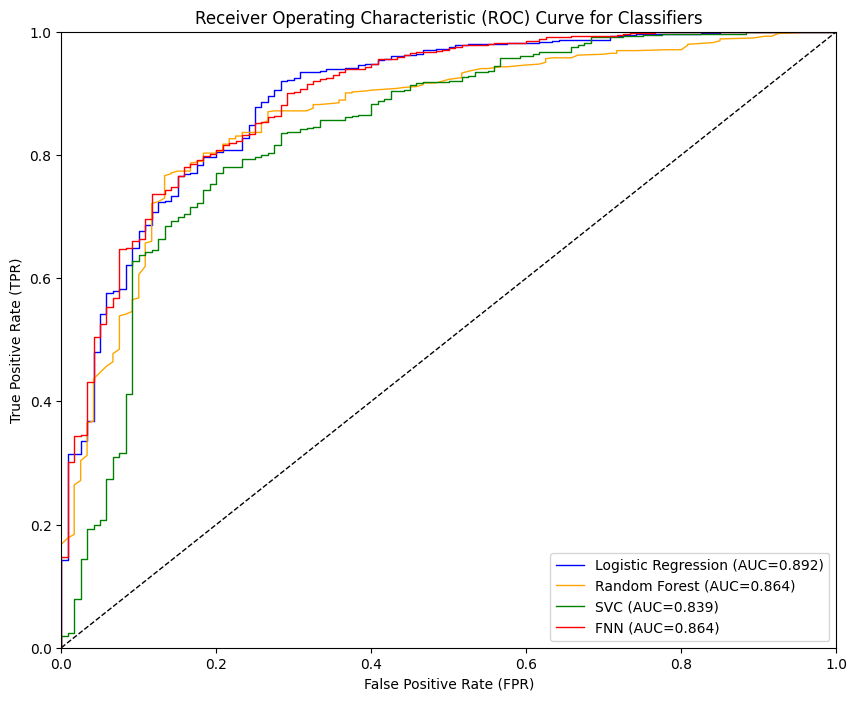

In [ ]:
# plot ROC-AUC for all classifiers:
plt.figure(figsize=(10, 8))
plt.plot(lr_FPRs, lr_TPRs, color='blue', lw=1, label=f'Logistic Regression (AUC={lr_auc:.3f})')
plt.plot(rf_FPRs, rf_TPRs, color='orange', lw=1, label=f'Random Forest (AUC={rf_auc:.3f})')
plt.plot(svc_FPRs, svc_TPRs, color='green', lw=1, label=f'SVC (AUC={svc_auc:.3f})')
plt.plot(fnn_FPRs, fnn_TPRs, color='red', lw=1, label=f'FNN (AUC={fnn_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Classifiers')
plt.legend(loc="lower right")

In [ ]:
# The ideal model (highest AUC then)
# 1) maximizes specificity (TNR)
# 2) maximizes precision
# 3) maximizes recall

results = {
    'LR': {'Precision': lr_precision, 'Recall': lr_recall, 'Specificity': lr_specificity, 'F1 Score': lr_f1, 'BER': lr_BER, 'AUC': lr_auc},
    'RF': {'Precision': rf_precision, 'Recall': rf_recall, 'Specificity': rf_specificity, 'F1 Score': rf_f1, 'BER': rf_BER, 'AUC': rf_auc},
    'SVC': {'Precision': svc_precision, 'Recall': svc_recall, 'Specificity': svc_specificity, 'F1 Score': svc_f1, 'BER': svc_BER, 'AUC': svc_auc},
    'FNN': {'Precision': fnn_precision, 'Recall': fnn_recall, 'Specificity': fnn_specificity, 'F1 Score': fnn_f1, 'BER': fnn_BER, 'AUC': fnn_auc}
}

results_df = pd.DataFrame(results).T
results_df

,Precision,Recall,Specificity,F1 Score,BER,AUC
LR,0.974249,0.662774,0.900000,0.788879,0.218613,0.892226
RF,0.969925,0.753285,0.866667,0.847987,0.190024,0.863759
SVC,0.956124,0.763504,0.800000,0.849026,0.218248,0.838881
FNN,0.972574,0.672993,0.891667,0.795513,0.217670,0.863759


### Both LR and FNN have similar performance across precision, recall, specificity, F1, and BER. Given that LR has a slight improvement over FNN in terms of AUC, we will use pick AUC as the optimal model and take survival probabilities from it.

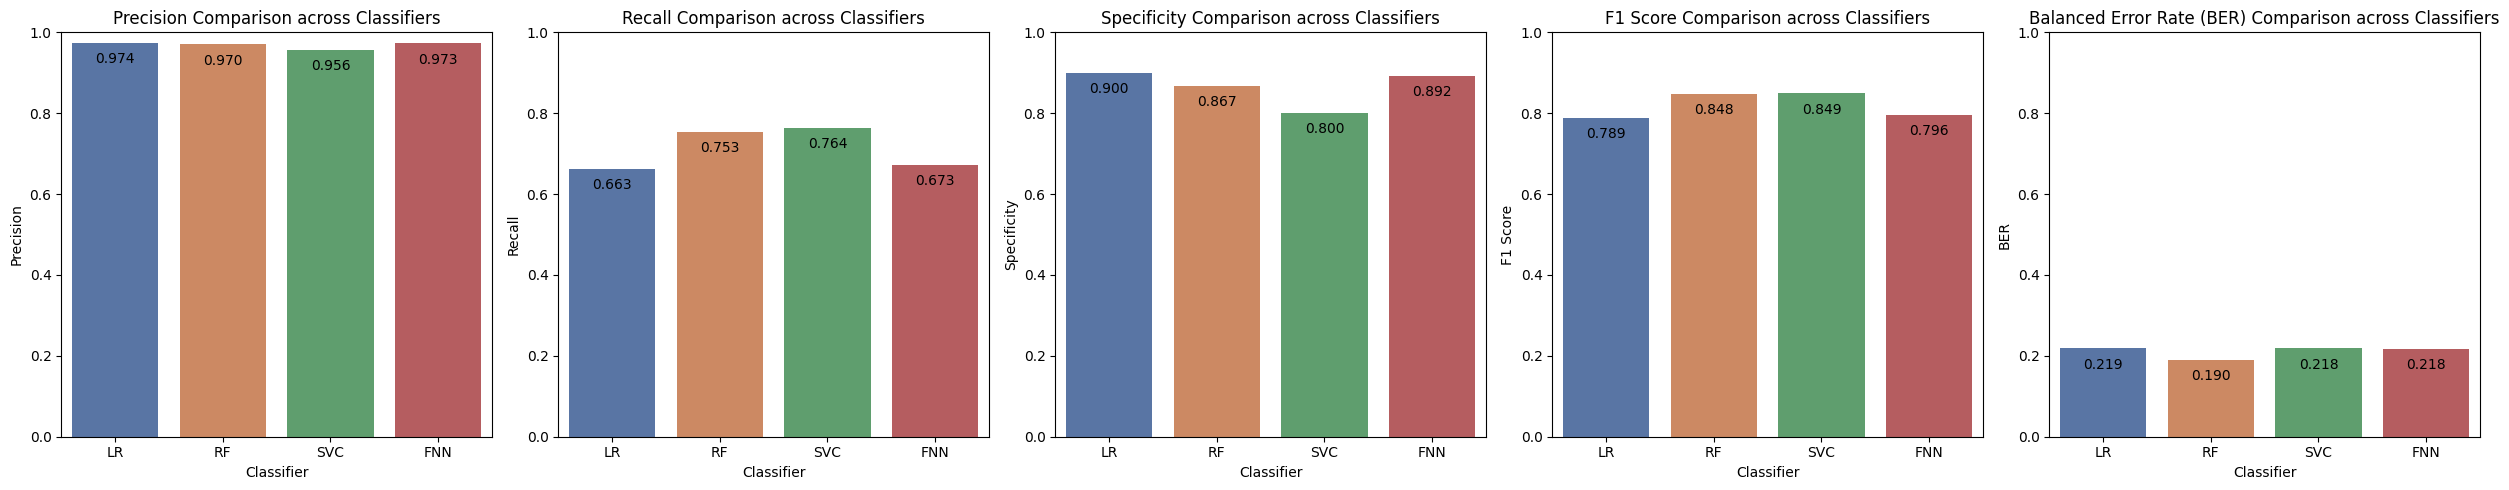

In [ ]:
plt.figure(figsize=(25,5))

# Plot precision
plt.subplot(1, 5, 1)
precision_plot = sns.barplot(x=results_df.index, y=results_df['Precision'], palette='deep')
plt.title('Precision Comparison across Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Precision')
plt.ylim(0, 1)

for idx, value in enumerate(results_df['Precision']):
    precision_plot.text(idx, value-0.05, f'{value:.3f}', ha='center')

# Plot Recall
plt.subplot(1, 5, 2)
recall_plot = sns.barplot(x=results_df.index, y=results_df['Recall'], palette='deep')
plt.title('Recall Comparison across Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Recall')
plt.ylim(0, 1)

for idx, value in enumerate(results_df['Recall']):
    recall_plot.text(idx, value-0.05, f'{value:.3f}', ha='center')

# Plot Specificity
plt.subplot(1, 5, 3)
specificity_plot = sns.barplot(x=results_df.index, y=results_df['Specificity'], palette='deep')
plt.title('Specificity Comparison across Classifiers')
plt.xlabel('Classifier')
plt.ylabel('Specificity')
plt.ylim(0, 1)

for idx, value in enumerate(results_df['Specificity']):
    specificity_plot.text(idx, value-0.05, f'{value:.3f}', ha='center')

# Plot F1 Score
plt.subplot(1, 5, 4)
f1_plot = sns.barplot(x=results_df.index, y=results_df['F1 Score'], palette='deep')
plt.title('F1 Score Comparison across Classifiers')
plt.xlabel('Classifier')
plt.ylabel('F1 Score')
plt.ylim(0, 1)

for idx, value in enumerate(results_df['F1 Score']):
    f1_plot.text(idx, value-0.05, f'{value:.3f}', ha='center')

# Plot BER
plt.subplot(1, 5, 5)
ber_plot = sns.barplot(x=results_df.index, y=results_df['BER'], palette='deep')
plt.title('Balanced Error Rate (BER) Comparison across Classifiers')
plt.xlabel('Classifier')
plt.ylabel('BER')
plt.ylim(0, 1)

for idx, value in enumerate(results_df['BER']):
    ber_plot.text(idx, value-0.05, f'{value:.3f}', ha='center')

plt.tight_layout()

In terms of precision, TNR, and FPR, both logistic regression and feed-forward neural network perform the best. However, the logistic regressor has AUC=0.892, while FNN has AUC=0.864.

In [ ]:
X_test_surviv # before scaling

,Age,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
1718,45,1,3,0,15,1,1,24,1,80
1204,61,1,2,0,17,1,1,8,1,48
2722,61,3,2,0,28,1,0,32,5,61
1937,40,3,2,0,60,1,1,14,5,53
1226,45,1,1,0,14,1,1,13,1,94
...,...,...,...,...,...,...,...,...,...,...
1601,51,3,2,0,13,1,1,17,4,69
3471,57,2,2,0,25,1,1,2,1,56
3463,52,3,2,0,34,1,1,34,7,63
3883,62,1,2,0,11,1,1,2,1,60


In [ ]:
X_test # after scaling

,Age,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months
1718,-1.085433,1,3,0,-0.712100,1,1,1.158115,-0.606332,0.352921
1204,0.734929,1,2,0,-0.623273,1,1,-0.831816,-0.606332,-1.031253
2722,0.734929,3,2,0,-0.134729,1,0,2.153080,0.231603,-0.468932
1937,-1.654297,3,2,0,1.286491,1,1,-0.085592,0.231603,-0.814975
1226,-1.085433,1,1,0,-0.756513,1,1,-0.209962,-0.606332,0.958498
...,...,...,...,...,...,...,...,...,...,...
1601,-0.402798,3,2,0,-0.800926,1,1,0.287520,0.022119,-0.122888
3471,0.279838,2,2,0,-0.267968,1,1,-1.578039,-0.606332,-0.685209
3463,-0.289025,3,2,0,0.131750,1,1,2.401821,0.650571,-0.382421
3883,0.848702,1,2,0,-0.889752,1,1,-1.578039,-0.606332,-0.512187


In [ ]:
# extract from probability of being in class '1' from scaled data
lr_survival_probs = lr_mod.predict_proba(X_test)[:,1]

# fnn_predicted_probs

# add survival probs to X_test_surviv data
X_test_surviv['Survival %'] = lr_survival_probs
X_test_surviv['Survival %'] = (X_test_surviv['Survival %'] * 100).round(1).astype(str) + '%'


In [ ]:
X_test_surviv

,Age,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Survival %
1718,45,1,3,0,15,1,1,24,1,80,86.8%
1204,61,1,2,0,17,1,1,8,1,48,24.2%
2722,61,3,2,0,28,1,0,32,5,61,27.8%
1937,40,3,2,0,60,1,1,14,5,53,27.5%
1226,45,1,1,0,14,1,1,13,1,94,89.2%
...,...,...,...,...,...,...,...,...,...,...,...
1601,51,3,2,0,13,1,1,17,4,69,58.7%
3471,57,2,2,0,25,1,1,2,1,56,29.8%
3463,52,3,2,0,34,1,1,34,7,63,54.2%
3883,62,1,2,0,11,1,1,2,1,60,34.3%


In [ ]:
y_test

1718    1
1204    1
2722    1
1937    0
1226    1
       ..
1601    1
3471    1
3463    0
3883    0
2215    1
Name: Status, Length: 805, dtype: int64

In [ ]:
[ (p,t) for p, t in zip(X_test_surviv['Survival %'], y_test)]

[('86.8%', 1),
 ('24.2%', 1),
 ('27.8%', 1),
 ('27.5%', 0),
 ('89.2%', 1),
 ('90.7%', 1),
 ('89.2%', 1),
 ('84.7%', 1),
 ('0.4%', 0),
 ('70.1%', 1),
 ('67.5%', 1),
 ('68.1%', 1),
 ('70.1%', 1),
 ('41.6%', 1),
 ('34.9%', 0),
 ('41.9%', 1),
 ('55.7%', 1),
 ('70.9%', 1),
 ('52.2%', 1),
 ('80.6%', 1),
 ('84.4%', 1),
 ('94.9%', 1),
 ('1.8%', 0),
 ('17.8%', 0),
 ('88.1%', 1),
 ('59.4%', 1),
 ('67.1%', 1),
 ('92.7%', 1),
 ('96.7%', 1),
 ('87.1%', 1),
 ('97.1%', 1),
 ('64.6%', 1),
 ('67.6%', 1),
 ('82.2%', 1),
 ('83.8%', 1),
 ('72.0%', 1),
 ('85.1%', 1),
 ('0.4%', 0),
 ('2.2%', 0),
 ('1.7%', 0),
 ('51.5%', 1),
 ('78.0%', 1),
 ('6.3%', 0),
 ('34.7%', 1),
 ('0.8%', 0),
 ('23.7%', 1),
 ('70.4%', 1),
 ('75.8%', 1),
 ('25.6%', 1),
 ('4.5%', 0),
 ('40.5%', 1),
 ('65.6%', 1),
 ('87.9%', 1),
 ('34.0%', 0),
 ('10.9%', 1),
 ('84.0%', 1),
 ('62.8%', 1),
 ('77.4%', 1),
 ('18.6%', 0),
 ('16.5%', 0),
 ('54.2%', 1),
 ('94.5%', 1),
 ('20.5%', 1),
 ('77.2%', 1),
 ('44.9%', 1),
 ('19.1%', 1),
 ('39.0%', 1),
 ('

In [ ]:
lr_mod.coef_[0] # e^cofficient

array([-0.14485964,  0.02727094,  0.08042396,  0.6201006 , -0.11520975,
        0.61922855,  1.08104743,  0.35257307, -0.69392656,  1.42271459])

In [ ]:
# Importance of each features according to Logistic Regression Model
pd.DataFrame({'Feature': X_train_smote.columns, 'Coefficient': lr_mod.coef_[0]})

,Feature,Coefficient
0,Age,-0.144860
1,6th Stage,0.027271
2,Grade,0.080424
3,A Stage,0.620101
4,Tumor Size,-0.115210
5,Estrogen Status,0.619229
6,Progesterone Status,1.081047
7,Regional Node Examined,0.352573
8,Regional Node Positive,-0.693927
9,Survival Months,1.422715
